# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import csv
import json
from citipy import citipy

api_key = "48ca97d681691e70ebcc48bde74249b6"

output_data_file = "../output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_list = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

counter = 1
set_number = 1


print("Beginning Data Retrieval")
print("--------------------------")

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50): 
        set_number +=1
        counter =0
        
    url = "http://api.openweathermap.org/data/2.5/weather?"
        
    query_url = url + "q=" + city + "&appid=" + api_key
    counter +=1 
 
    try: 
        weather = requests.get(query_url).json()
       
        wind_speed = weather["wind"]["speed"]                                        
        max_temp = weather["main"]["temp_max"]
        lng = weather["coord"]["lon"]
        lat = weather["coord"]["lat"]
        humidity = weather["main"]["humidity"]
        date = weather["dt"]
        country = weather["sys"]["country"]
        cloudiness = weather["clouds"]["all"]  
      
        
        city_list.append({"Wind Speed": wind_speed,
                          "Max Temp": max_temp,
                          "Lng": lng,
                          "Lat": lat,
                          "Humidity": humidity,
                          "Date": date,
                          "Country": country,
                          "Cloudiness": cloudiness})
 
        
    except:
        print("City not found. Skipping...")
    
    if counter <= 50:
        print(f"Processing Record {counter} of set {set_number} | {city}")
   
    else:   
       counter = 1
       set_number += 1
       print(f"Processing Record {counter} of set {set_number} | {city}") 

    counter += 1   

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
--------------------------
Processing Record 2 of set 1 | meulaboh
Processing Record 4 of set 1 | severo-kurilsk
Processing Record 6 of set 1 | zhanaozen
Processing Record 8 of set 1 | provideniya
Processing Record 10 of set 1 | kavieng
Processing Record 12 of set 1 | sungaipenuh
Processing Record 14 of set 1 | busselton
Processing Record 16 of set 1 | hermanus
City not found. Skipping...
Processing Record 18 of set 1 | urulga
Processing Record 20 of set 1 | yellowknife
Processing Record 22 of set 1 | mataura
City not found. Skipping...
Processing Record 24 of set 1 | attawapiskat
Processing Record 26 of set 1 | ilo
Processing Record 28 of set 1 | butaritari
Processing Record 30 of set 1 | samarai
Processing Record 32 of set 1 | nsanje
Processing Record 34 of set 1 | bredasdorp
Processing Record 36 of set 1 | new norfolk
Processing Record 38 of set 1 | saint-philippe
Processing Record 40 of set 1 | wanning
Processing Record 42 of set 1 | saldanha
Processing Rec

Processing Record 13 of set 8 | sao desiderio
Processing Record 15 of set 8 | hilo
Processing Record 17 of set 8 | diu
Processing Record 19 of set 8 | mikhaylovka
Processing Record 21 of set 8 | carnarvon
Processing Record 23 of set 8 | aswan
Processing Record 25 of set 8 | boz
Processing Record 27 of set 8 | port augusta
City not found. Skipping...
Processing Record 29 of set 8 | lolua
Processing Record 31 of set 8 | buala
Processing Record 33 of set 8 | haines junction
Processing Record 35 of set 8 | corinto
Processing Record 37 of set 8 | gweru
Processing Record 39 of set 8 | mutoko
Processing Record 41 of set 8 | ahipara
City not found. Skipping...
Processing Record 43 of set 8 | sentyabrskiy
Processing Record 45 of set 8 | xifeng
Processing Record 47 of set 8 | matagami
City not found. Skipping...
Processing Record 49 of set 8 | atlantic city
Processing Record 1 of set 9 | north bend
Processing Record 3 of set 9 | constitucion
Processing Record 5 of set 9 | whitehorse
Processing R

Processing Record 29 of set 15 | auki
Processing Record 31 of set 15 | san juan
Processing Record 33 of set 15 | fairbanks
Processing Record 35 of set 15 | cayenne
Processing Record 37 of set 15 | freeport
Processing Record 39 of set 15 | repatriacion
Processing Record 41 of set 15 | maragogi
Processing Record 43 of set 15 | waddan
Processing Record 45 of set 15 | pemberton
Processing Record 47 of set 15 | taltal
Processing Record 49 of set 15 | santa isabel
Processing Record 1 of set 16 | labuhan
Processing Record 3 of set 16 | karratha
Processing Record 5 of set 16 | verkhnyaya inta
Processing Record 7 of set 16 | sola
Processing Record 9 of set 16 | port hardy
Processing Record 11 of set 16 | gimli
Processing Record 13 of set 16 | yaan
Processing Record 15 of set 16 | bridlington
City not found. Skipping...
Processing Record 17 of set 16 | tsihombe
Processing Record 19 of set 16 | aksarka
City not found. Skipping...
Processing Record 21 of set 16 | el faiyum
City not found. Skipping

Processing Record 43 of set 22 | anloga
Processing Record 45 of set 22 | kushiro
Processing Record 47 of set 22 | namatanai
City not found. Skipping...
Processing Record 49 of set 22 | shkotovo-26
Processing Record 1 of set 23 | rantauprapat
Processing Record 3 of set 23 | yinchuan
City not found. Skipping...
Processing Record 5 of set 23 | haibowan
Processing Record 7 of set 23 | den helder
Processing Record 9 of set 23 | dangriga
Processing Record 11 of set 23 | ornskoldsvik
Processing Record 13 of set 23 | la paz
Processing Record 15 of set 23 | touros
Processing Record 17 of set 23 | takaka
Processing Record 19 of set 23 | phan thiet
Processing Record 21 of set 23 | aleksandrovskoye
Processing Record 23 of set 23 | coihaique
Processing Record 25 of set 23 | mattru
Processing Record 27 of set 23 | kawambwa
Processing Record 29 of set 23 | tilichiki
Processing Record 31 of set 23 | cheney
Processing Record 33 of set 23 | gejiu
Processing Record 35 of set 23 | rio gallegos
Processing 

In [4]:
city_list

[{'Wind Speed': 4.2,
  'Max Temp': 302.977,
  'Lng': 96.13,
  'Lat': 4.14,
  'Humidity': 74,
  'Date': 1556085768,
  'Country': 'ID',
  'Cloudiness': 98},
 {'Wind Speed': 2.22,
  'Max Temp': 273.677,
  'Lng': 156.12,
  'Lat': 50.68,
  'Humidity': 90,
  'Date': 1556085819,
  'Country': 'RU',
  'Cloudiness': 61},
 {'Wind Speed': 6.61,
  'Max Temp': 287.177,
  'Lng': 52.85,
  'Lat': 43.35,
  'Humidity': 47,
  'Date': 1556085870,
  'Country': 'KZ',
  'Cloudiness': 100},
 {'Wind Speed': 4,
  'Max Temp': 268.15,
  'Lng': -173.23,
  'Lat': 64.42,
  'Humidity': 57,
  'Date': 1556082000,
  'Country': 'RU',
  'Cloudiness': 20},
 {'Wind Speed': 3.22,
  'Max Temp': 303.177,
  'Lng': 150.8,
  'Lat': -2.57,
  'Humidity': 69,
  'Date': 1556085658,
  'Country': 'PG',
  'Cloudiness': 6},
 {'Wind Speed': 2.14,
  'Max Temp': 305.877,
  'Lng': 101.38,
  'Lat': -2.08,
  'Humidity': 56,
  'Date': 1556085597,
  'Country': 'ID',
  'Cloudiness': 56},
 {'Wind Speed': 2.02,
  'Max Temp': 300.93,
  'Lng': 115.35,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(city_list)
weather_df

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,98,ID,1556085768,74,4.14,96.13,302.977,4.20
1,61,RU,1556085819,90,50.68,156.12,273.677,2.22
2,100,KZ,1556085870,47,43.35,52.85,287.177,6.61
3,20,RU,1556082000,57,64.42,-173.23,268.150,4.00
4,6,PG,1556085658,69,-2.57,150.80,303.177,3.22
5,56,ID,1556085597,56,-2.08,101.38,305.877,2.14
6,0,AU,1556085567,28,-33.64,115.35,300.930,2.02
7,39,ZA,1556085644,97,-34.42,19.24,290.930,7.47
8,75,CA,1556085164,69,62.45,-114.38,275.150,2.10
9,40,NZ,1556085609,84,-46.19,168.86,287.590,2.24


In [6]:
weather_frame = pd.DataFrame({"City": city_name,
                             "Cloudiness": cloudiness,
                             "Country": country,
                             "Date": date,
                             "Humidity": humidity,
                             "Lat": lat,
                             "Lng": lng,
                             "Max Temp": max_temp,
                             "Max Windspeed": wind_speed})

weather_frame.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Max Windspeed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

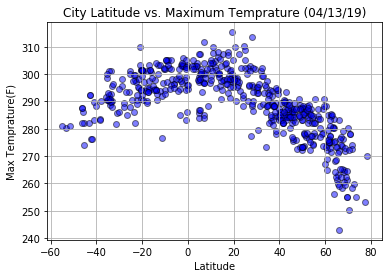

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black", label="Temp", alpha=0.5)

plt.grid()

plt.title("City Latitude vs. Maximum Temprature (04/13/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature(F)")

plt.show()

#### Latitude vs. Humidity Plot

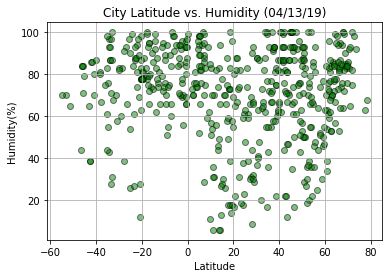

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", facecolors="green", edgecolors="black", label="Humidity", alpha=0.5)

plt.grid()

plt.title("City Latitude vs. Humidity (04/13/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.show()

#### Latitude vs. Cloudiness Plot

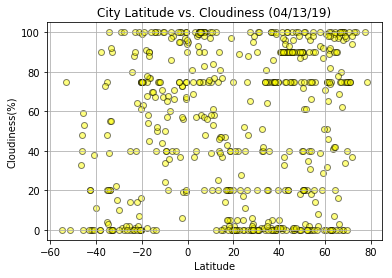

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", facecolors="yellow", edgecolors="black", label="Cloudiness", alpha=0.5)

plt.grid()

plt.title("City Latitude vs. Cloudiness (04/13/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.show()

#### Latitude vs. Wind Speed Plot

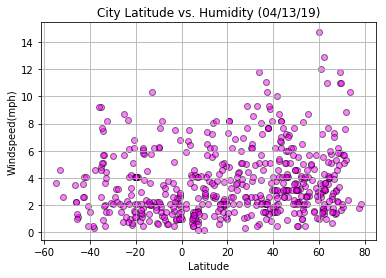

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", facecolors="magenta", edgecolors="black", label="Windspeed", alpha=0.5)

plt.grid()

plt.title("City Latitude vs. Humidity (04/13/19)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")

plt.show()